# Importing Libaries and Data

### This script contains the following:
#### 1. Import data and libraries
#### 2. Data wrangling
#### 3. Data cleaning
#### 5. Checking for extreme values
#### 6. Plotting a choropleth
#### 7. Discussion of results

In [1]:
#Imported Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 
%matplotlib inline

In [3]:
#Imported path
path = r'/Users/racheldurand/Desktop/Data Analytics/Achievement 6'

In [4]:
path

'/Users/racheldurand/Desktop/Data Analytics/Achievement 6'

In [5]:
#Imported clean dataset as json
states_geo =r'/Users/racheldurand/Desktop/Data Analytics/Achievement 6/Prepared Data/us-states.json'

In [6]:
states_geo

'/Users/racheldurand/Desktop/Data Analytics/Achievement 6/Prepared Data/us-states.json'

In [7]:
#Imported Adidas US Sales Dataset.csv
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'df_adidas_US_clean.csv'), index_col = False)

# Data Wrangling and Cleaning

In [8]:
#Checked head
df.head()

,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Invoice Year,Invoice Month
0,Foot Locker,1/1/20,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.50,In-store,2020,1
1,Foot Locker,1/2/20,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.30,In-store,2020,1
2,Foot Locker,1/3/20,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store,2020,1
3,Foot Locker,1/4/20,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store,2020,1
4,Foot Locker,1/5/20,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.30,In-store,2020,1


In [9]:
#Checked shape
df.shape

(9648, 14)

In [10]:
#Deleted unnecessary columns
df = df.drop(columns=['Invoice Date'])

In [11]:
df.columns

Index(['Retailer', 'Region', 'State', 'City', 'Product', 'Price per Unit',
       'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin',
       'Sales Method', 'Invoice Year', 'Invoice Month'],
      dtype='object')

In [12]:
#Rechecked shape
df.shape

(9648, 13)

In [13]:
#Checked for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9643    False
9644    False
9645    False
9646    False
9647    False
Length: 9648, dtype: bool

No duplicates.

In [14]:
#Checked for missing values 
df.isnull().sum()

Retailer            0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
Invoice Year        0
Invoice Month       0
dtype: int64

# Checking for Extreme Values

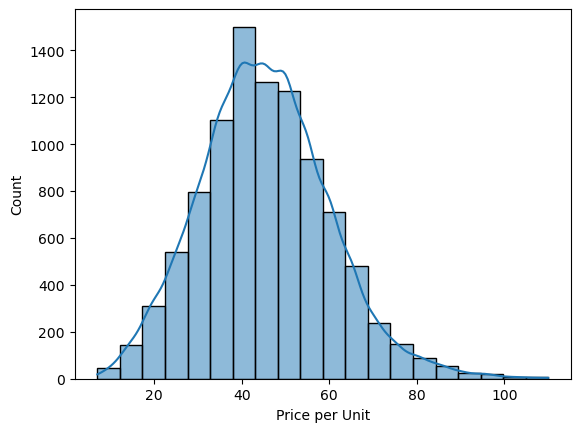

In [15]:
#Created a histogram for extreme values for Price per Unit
hist_price = sns.histplot(df['Price per Unit'], bins = 20, kde = True)

In [41]:
#Saved histogram
hist_price.figure.savefig(os.path.join(path, 'Visualizations','his_price.png'), bbox_inches='tight')

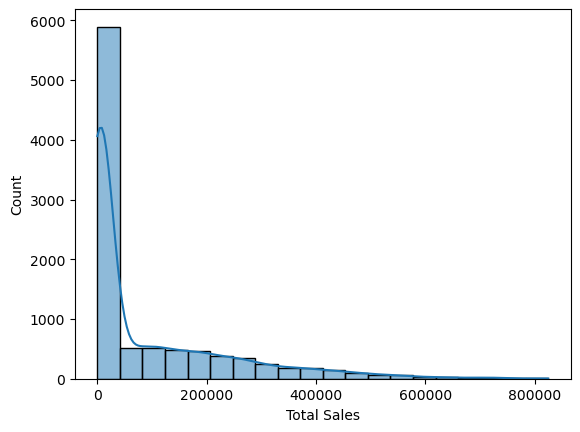

In [16]:
#Created a histogram for extreme values for Total Sales
hist_tot_sales = sns.histplot(df['Total Sales'], bins = 20, kde = True)

In [42]:
#Saved histogram
hist_tot_sales.figure.savefig(os.path.join(path, 'Visualizations','hist_tot_sales.png'), bbox_inches='tight')

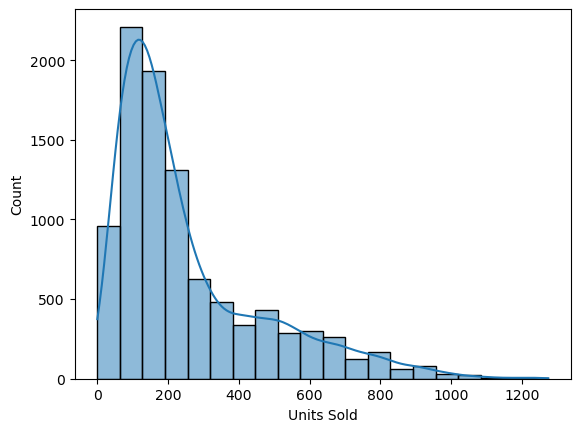

In [17]:
#Created a histogram for extreme values for Units Sold
hist_units_sold = sns.histplot(df['Units Sold'], bins = 20, kde = True)

In [43]:
#Saved histogram
hist_units_sold.figure.savefig(os.path.join(path, 'Visualizations','hist_units_sold.png'), bbox_inches='tight')

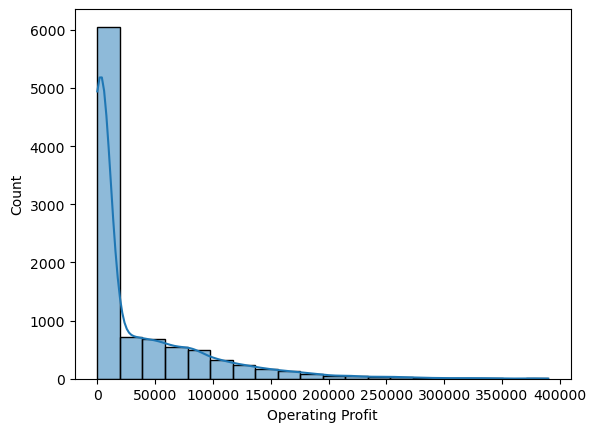

In [18]:
#Created a histogram for extreme values for Operating Profit
hist_op_profit = sns.histplot(df['Operating Profit'], bins = 20, kde = True)

In [44]:
#Saved histogram
hist_op_profit.figure.savefig(os.path.join(path, 'Visualizations','hist_op_profit.png'), bbox_inches='tight')

# Plotting a Chlropleth

In [19]:
# Created dataframe with just the states and the values for total sales 

data_to_plot = df[['State','Total Sales']]
data_to_plot.head(100)

,State,Total Sales
0,New York,600000
1,New York,500000
2,New York,400000
3,New York,382500
4,New York,540000
...,...,...
95,Texas,280000
96,Texas,270000
97,Texas,380000
98,Texas,380000


In [26]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = states_geo, 
    data = data_to_plot,
    columns = ['State', 'Total Sales'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrRd', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Total Sales by State").add_to(map)
folium.LayerControl().add_to(map)

map

In [32]:
# Created dataframe with just the states and the values for units sold

data_to_plot2 = df[['State','Units Sold']]
data_to_plot2.head(100)

,State,Units Sold
0,New York,1200
1,New York,1000
2,New York,1000
3,New York,850
4,New York,900
...,...,...
95,Texas,700
96,Texas,600
97,Texas,950
98,Texas,950


In [39]:
# Setup a folium map at a high-level zoom
map2 = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = states_geo, 
    data = data_to_plot2,
    columns = ['State', 'Units Sold'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'RdPu', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Units Sold by State").add_to(map2)
folium.LayerControl().add_to(map)

map2

In [27]:
# Save the map as an HTML file
map.save('interactive_map.html')

In [40]:
# Save the map2 as an HTML file
map2.save('interactive_map2.html')

# Discussion of Results

Based on the histograms for Price per Unit, Units Sold, Total Sales, and Operating Profit there does not seem to be any extreme values present in these charts.

Based on map 1 the total sales are the highest in Washington and New York, while they are the lowest in states like North Dakota and Iowa.

Based on map 2 the units sold are the highest in Georgia and New York, while they are the lowest in states like North Dakota and Iowa.

It can be seen between these two maps how total sales and units sold show a positive relationship with how the states with more units sold have a higher total sales.